## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# J-V 커브는 X축 Voc, Y축 Jsc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import shap

import warnings
warnings.filterwarnings('ignore')

## 2. Data Preparation

In [2]:
df_Pristine = pd.read_csv('Pristine_C.csv')
df_TNP = pd.read_csv('TNP_C.csv')
df_PCBM = pd.read_csv('PCBM_C.csv')
df_TNP_PCBM = pd.read_csv('TNP_PCBM_C.csv')

### Pristine

Text(0, 0.5, 'Jsc')

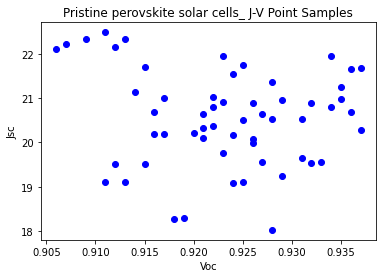

In [3]:
Voc_Pristine = df_Pristine[["Voc"]].values
Jsc_Pristine = df_Pristine[["Jsc"]].values

fig_Pristine_JV = plt.figure()
ax = fig_Pristine_JV.add_subplot(1, 1, 1)

plt.scatter(Voc_Pristine, Jsc_Pristine, color = 'blue', marker = 'o')
plt.title("Pristine perovskite solar cells_ J-V Point Samples")
plt.xlabel("Voc")
plt.ylabel("Jsc")

Text(0, 0.5, 'ECE')

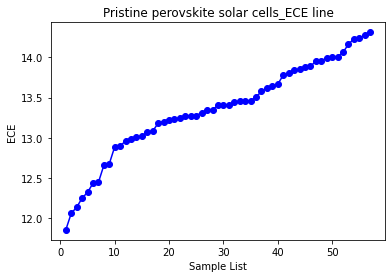

In [4]:
Efficiency_Pristine = df_Pristine[["ECE"]].values
sample_list = list(range(1,58,1))

fig_Pristine_ECE = plt.figure()
ax = fig_Pristine_ECE.add_subplot(1, 1, 1)

plt.plot(sample_list, Efficiency_Pristine, color = 'blue', marker = 'o')
plt.title("Pristine perovskite solar cells_ECE line")
plt.xlabel("Sample List")
plt.ylabel("ECE")

### TiO2_NanopPatterned

Text(0, 0.5, 'Jsc')

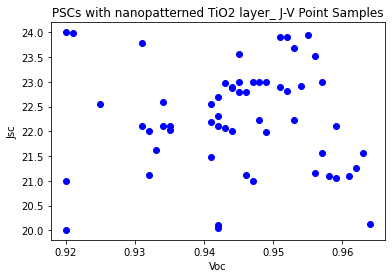

In [5]:
Voc_TNP = df_TNP[["Voc"]].values
Jsc_TNP = df_TNP[["Jsc"]].values

fig_TNP_JV = plt.figure()
ax = fig_TNP_JV.add_subplot(1, 1, 1)

plt.scatter(Voc_TNP, Jsc_TNP, color = 'blue', marker = 'o')
plt.title("PSCs with nanopatterned TiO2 layer_ J-V Point Samples")
plt.xlabel("Voc")
plt.ylabel("Jsc")

Text(0, 0.5, 'ECE')

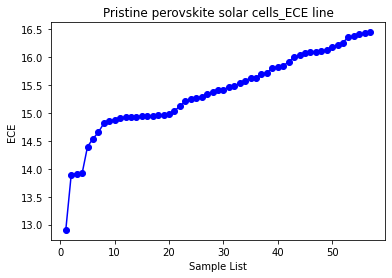

In [6]:
Efficiency_Pristine = df_TNP[["ECE"]].values
sample_list = list(range(1,58,1))

fig_TNP_ECE = plt.figure()
ax = fig_TNP_ECE.add_subplot(1, 1, 1)

plt.plot(sample_list, Efficiency_Pristine, color = 'blue', marker = 'o')
plt.title("Pristine perovskite solar cells_ECE line")
plt.xlabel("Sample List")
plt.ylabel("ECE")

### PCBM

Text(0, 0.5, 'Jsc')

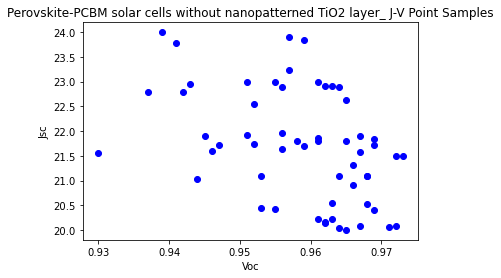

In [7]:
Voc_PCBM = df_PCBM[["Voc"]].values
Jsc_PCBM = df_PCBM[["Jsc"]].values

fig_PCBM_JV = plt.figure()
ax = fig_PCBM_JV.add_subplot(1, 1, 1)

plt.scatter(Voc_PCBM, Jsc_PCBM, color = 'blue', marker = 'o')
plt.title("Perovskite-PCBM solar cells without nanopatterned TiO2 layer_ J-V Point Samples")
plt.xlabel("Voc")
plt.ylabel("Jsc")

Text(0, 0.5, 'ECE')

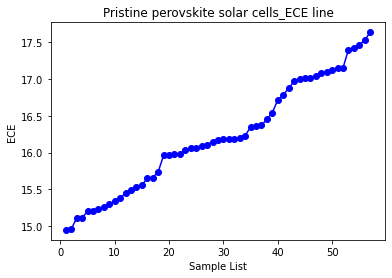

In [8]:
Efficiency_Pristine = df_PCBM[["ECE"]].values
sample_list = list(range(1,58,1))

fig_PCBM_ECE = plt.figure()
ax = fig_PCBM_ECE.add_subplot(1, 1, 1)

plt.plot(sample_list, Efficiency_Pristine, color = 'blue', marker = 'o')
plt.title("Pristine perovskite solar cells_ECE line")
plt.xlabel("Sample List")
plt.ylabel("ECE")

### TiO2_NanoPatterend + PCBM

Text(0, 0.5, 'Jsc')

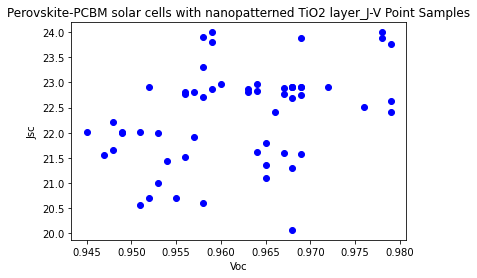

In [9]:
Voc_TNP_PCBM = df_TNP_PCBM[["Voc"]].values
Jsc_TNP_PCBM = df_TNP_PCBM[["Jsc"]].values

fig_TNP_PCBM_JV = plt.figure()
ax = fig_TNP_PCBM_JV.add_subplot(1, 1, 1)

plt.scatter(Voc_TNP_PCBM, Jsc_TNP_PCBM, color = 'blue', marker = 'o')
plt.title("Perovskite-PCBM solar cells with nanopatterned TiO2 layer_J-V Point Samples")
plt.xlabel("Voc")
plt.ylabel("Jsc")

Text(0, 0.5, 'ECE')

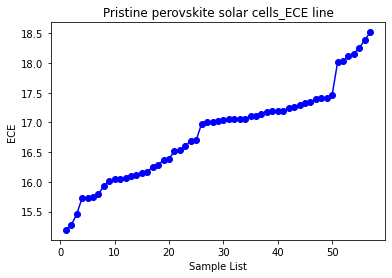

In [10]:
Efficiency_Pristine = df_TNP_PCBM[["ECE"]].values
sample_list = list(range(1,58,1))

fig_TNP_PCBM_ECE = plt.figure()
ax = fig_TNP_PCBM_ECE.add_subplot(1, 1, 1)

plt.plot(sample_list, Efficiency_Pristine, color = 'blue', marker = 'o')
plt.title("Pristine perovskite solar cells_ECE line")
plt.xlabel("Sample List")
plt.ylabel("ECE")

## 3. Pearson Correlation Coefficient (PCC)

In [11]:
df_Pristine

,PSC,Jsc,Voc,ff,ECE,Name
0,Sample # 1,18.265,0.918,0.707,11.854,Pristine
1,Sample # 2,18.025,0.928,0.721,12.060,Pristine
2,Sample # 3,18.291,0.919,0.722,12.136,Pristine
3,Sample # 4,19.108,0.925,0.693,12.249,Pristine
4,Sample # 5,19.105,0.911,0.708,12.322,Pristine
5,Sample # 6,19.099,0.913,0.713,12.433,Pristine
6,Sample # 7,19.078,0.924,0.706,12.445,Pristine
7,Sample # 8,19.759,0.923,0.694,12.657,Pristine
8,Sample # 9,19.522,0.912,0.712,12.676,Pristine
9,Sample # 10,19.241,0.929,0.721,12.888,Pristine


## 4. One-Hot Encoding

In [12]:
data = pd.concat([df_Pristine, df_TNP, df_PCBM, df_TNP_PCBM], ignore_index=True, axis = 0)

In [13]:
data

,PSC,Jsc,Voc,ff,ECE,Name,TNP,PCBM,TNP_PCBM
0,Sample # 1,18.265,0.918,0.707,11.854,Pristine,NaN,NaN,NaN
1,Sample # 2,18.025,0.928,0.721,12.060,Pristine,NaN,NaN,NaN
2,Sample # 3,18.291,0.919,0.722,12.136,Pristine,NaN,NaN,NaN
3,Sample # 4,19.108,0.925,0.693,12.249,Pristine,NaN,NaN,NaN
4,Sample # 5,19.105,0.911,0.708,12.322,Pristine,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
223,NaN,23.909,0.958,0.791,18.118,TNP_PCBM,NaN,NaN,Sample # 53
224,NaN,23.999,0.959,0.789,18.159,TNP_PCBM,NaN,NaN,Sample # 54
225,NaN,23.994,0.978,0.778,18.257,TNP_PCBM,NaN,NaN,Sample # 55
226,NaN,23.767,0.979,0.790,18.382,TNP_PCBM,NaN,NaN,Sample # 56


In [14]:
data = data[['Jsc', 'Voc', 'ff', 'ECE', 'Name']]

In [15]:
data

,Jsc,Voc,ff,ECE,Name
0,18.265,0.918,0.707,11.854,Pristine
1,18.025,0.928,0.721,12.060,Pristine
2,18.291,0.919,0.722,12.136,Pristine
3,19.108,0.925,0.693,12.249,Pristine
4,19.105,0.911,0.708,12.322,Pristine
...,...,...,...,...,...
223,23.909,0.958,0.791,18.118,TNP_PCBM
224,23.999,0.959,0.789,18.159,TNP_PCBM
225,23.994,0.978,0.778,18.257,TNP_PCBM
226,23.767,0.979,0.790,18.382,TNP_PCBM


In [62]:
# def one_hot(x):
#     if x == 'Pristine':
#         return [1,0,0,0]
#     elif x == 'TNP':
#         return [1,1,0,0]
#     elif x == 'PCBM':
#         return [1,0,1,0]
#     else:    # TNP_PCBM
#         return [1,1,1,1]
   
# def one_hot(x):
#    if x == 'Pristine':
#        return [1,0,0,0]
#    elif x == 'TNP':
#        return [0,1,0,0]
#    elif x == 'PCBM':
#        return [0,0,1,0]
#    else:    # TNP_PCBM
#        return [0,0,0,1]

def one_hot(x):
   if x == 'Pristine':
       return [1,0,0,0]
   elif x == 'TNP':
       return [1,1,0,0]
   elif x == 'PCBM':
       return [1,0,1,0]
   else:    # TNP_PCBM
       return [1,0,0,1]

In [63]:
data['one_hot'] = data['Name'].apply(lambda x: one_hot(x))

In [95]:
data

,Jsc,Voc,ff,ECE,Name,one_hot,a,b,c,d
0,18.265,0.918,0.707,11.854,Pristine,"[1, 0, 0, 0]",1,0,0,0
1,18.025,0.928,0.721,12.060,Pristine,"[1, 0, 0, 0]",1,0,0,0
2,18.291,0.919,0.722,12.136,Pristine,"[1, 0, 0, 0]",1,0,0,0
3,19.108,0.925,0.693,12.249,Pristine,"[1, 0, 0, 0]",1,0,0,0
4,19.105,0.911,0.708,12.322,Pristine,"[1, 0, 0, 0]",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
223,23.909,0.958,0.791,18.118,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1
224,23.999,0.959,0.789,18.159,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1
225,23.994,0.978,0.778,18.257,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1
226,23.767,0.979,0.790,18.382,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1


In [65]:
data[['a','b','c','d']]=[*data['one_hot']]

In [96]:
data

,Jsc,Voc,ff,ECE,Name,one_hot,a,b,c,d
0,18.265,0.918,0.707,11.854,Pristine,"[1, 0, 0, 0]",1,0,0,0
1,18.025,0.928,0.721,12.060,Pristine,"[1, 0, 0, 0]",1,0,0,0
2,18.291,0.919,0.722,12.136,Pristine,"[1, 0, 0, 0]",1,0,0,0
3,19.108,0.925,0.693,12.249,Pristine,"[1, 0, 0, 0]",1,0,0,0
4,19.105,0.911,0.708,12.322,Pristine,"[1, 0, 0, 0]",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
223,23.909,0.958,0.791,18.118,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1
224,23.999,0.959,0.789,18.159,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1
225,23.994,0.978,0.778,18.257,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1
226,23.767,0.979,0.790,18.382,TNP_PCBM,"[1, 0, 0, 1]",1,0,0,1


In [21]:
data.to_excel('dataset_227.xlsx')

In [67]:
x_train = data[['a','b','c','d']]

In [68]:
x_train

,a,b,c,d
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
223,1,0,0,1
224,1,0,0,1
225,1,0,0,1
226,1,0,0,1


In [69]:
y_train = np.asanyarray(data['ECE'].tolist(), dtype = float)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1)

In [71]:
x_train.shape

(205, 4)

In [72]:
x_test

,a,b,c,d
99,1,1,0,0
181,1,0,0,1
82,1,1,0,0
204,1,0,0,1
49,1,0,0,0
10,1,0,0,0
215,1,0,0,1
186,1,0,0,1
44,1,0,0,0
45,1,0,0,0


In [73]:
y_train.shape

(205,)

In [74]:
y_test

array([16.001, 16.049, 15.292, 17.066, 14.005, 12.893, 17.335, 16.171,
       13.88 , 13.889, 17.396, 12.445, 16.345, 16.874, 13.46 , 16.375,
       16.432, 15.377, 17.055, 14.539, 13.617, 16.609, 14.94 ])

## 5. Machine Learning Part _ XGB_ECE

In [75]:
model_XGB = xgboost.XGBRegressor()
model_XGB.fit(x_train, y_train)

y_pred_XGB = model_XGB.predict(x_test)

result_t_XGB = pd.DataFrame({'pred' : y_pred_XGB, 'real' : y_test})

In [76]:
result_t_XGB

,pred,real
0,15.368748,16.001
1,16.845911,16.049
2,15.368748,15.292
3,16.845911,17.066
4,13.335439,14.005
5,13.335439,12.893
6,16.845911,17.335
7,16.845911,16.171
8,13.335439,13.880
9,13.335439,13.889


In [77]:
model_XGB.score(x_test, y_test)

0.8253147100520422

In [78]:
explainer_XGB = shap.TreeExplainer(model_XGB)

In [79]:
shap_values_XGB = explainer_XGB.shap_values(x_test)

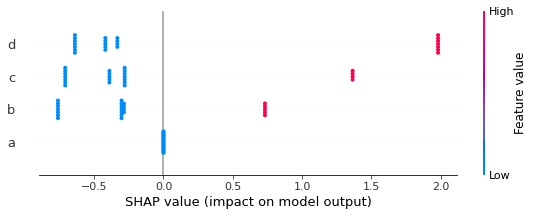

In [82]:
# summary
shap.summary_plot(shap_values_XGB, x_test)

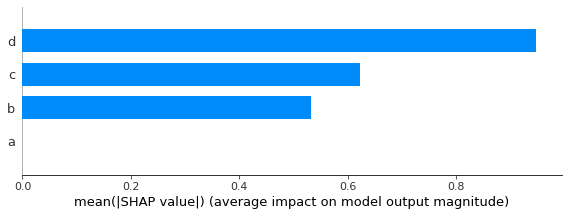

In [83]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values_XGB, x_test, plot_type = "bar")

## 6. Machine Learning Part _ RF_ECE

In [84]:
model_RF = RandomForestRegressor()
model_RF.fit(x_train, y_train)

y_pred_RF = model_RF.predict(x_test)

result_RF = pd.DataFrame({'pred' : y_pred_RF, 'real' : y_test})

In [85]:
result_RF

,pred,real
0,15.358515,16.001
1,16.836867,16.049
2,15.358515,15.292
3,16.836867,17.066
4,13.328837,14.005
5,13.328837,12.893
6,16.836867,17.335
7,16.836867,16.171
8,13.328837,13.880
9,13.328837,13.889


In [86]:
model_RF.score(x_test,y_test)

0.8256117264592632

In [87]:
explainer_RF = shap.TreeExplainer(model_RF)

In [88]:
shap_values_RF = explainer_RF.shap_values(x_test)

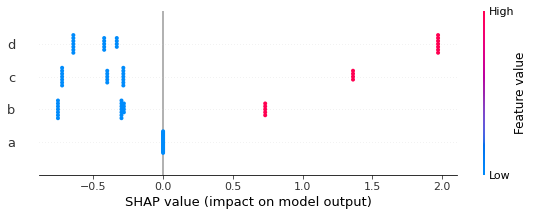

In [89]:
# summary
shap.summary_plot(shap_values_RF, x_test)

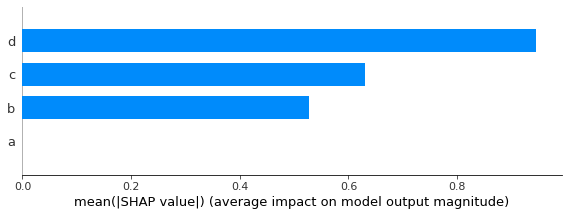

In [90]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values_RF, x_test, plot_type = "bar")